## PROJECT ON :
# HANDWRITTEN DIGITS RECOGNITION 

## Business Case :
Handwritten character recognition is one of the practically important issues in pattern recognition applications. The applications of digit recognition includes online handwriting recognition on computer tablets, recognize zip codes on mail for postal mail sorting, processing bank check amounts, numeric entries in forms filled up by hand (for example ‐ tax forms) and so on. Using technology it is possible to improve reliability and efficiency of handwritten digits recognition system. So here we will be predicting the performance of handwritten digits recognition using efficient machine learning techniques.



## Domain Analysis :
1. The data set used for this project is the MNIST ((Modified National Institute of Standards and Technology) digits data set.    It consists of handwritten digits in range 0 to 9. There are 60,000 handwritten digits to train a machine learning              model and 10,000 handwritten digits to test the model.
2. Handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the      machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit          recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.
3. In simple words hand-written digit cognizance is the capacity of a PC system to apprehend hand-written inputs such as          digits, characters, etc. from a extensive variety of sources such as emails, documents, images, letters, etc.
4. One of the most regularly and broadly used strategies for this application is  Convolution neural networks (CNN's)

## Importing libraries 

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd 
import numpy as np

In [3]:
from tensorflow.keras.datasets import mnist
d = mnist.load_data()


In [4]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [5]:
## length of training and testing data 
len(x_train),len(x_test)

(60000, 10000)

In [6]:
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [8]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


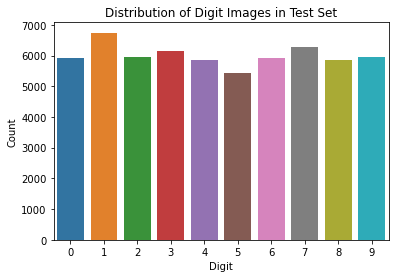

In [9]:
## Checking count plot of training data  
digits = pd.DataFrame.from_dict(y_train)
 
ax = sns.countplot(x=0, data=digits)
 
ax.set_title("Distribution of Digit Images in Test Set")
ax.set(xlabel='Digit')
ax.set(ylabel='Count')
 
plt.show()
 
## Maximum number of images consists of digit 1 and minimum of digit 5.

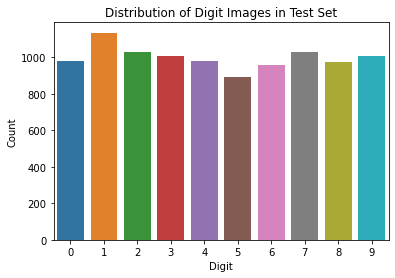

In [10]:
## Checking balance of data 
digits = pd.DataFrame.from_dict(y_test)
 
ax = sns.countplot(x=0, data=digits)
 
ax.set_title("Distribution of Digit Images in Test Set")
ax.set(xlabel='Digit')
ax.set(ylabel='Count')
 
plt.show()

## Data is balanced 

In [11]:
x_train[0].shape ## this is a 28 x 28  grid image

(28, 28)

In [12]:
x_train[0]  ## this a 2d array, 0 = black, 255=white 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

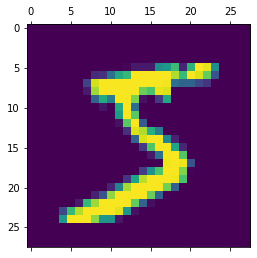

In [13]:
plt.matshow(x_train[0])
plt.show()

In [14]:
y_train[0]

5

In [15]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

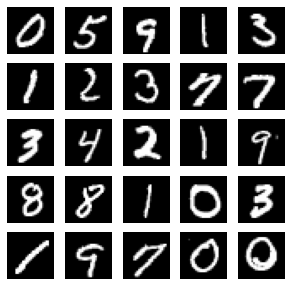

In [16]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [17]:
## Scaling pixels 
x_train=x_train/255
x_test=x_test/255


In [18]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
## Converting 28*28 grid into 1D array
x_train_flattened=x_train.reshape(len(x_train),28*28) 

In [20]:
x_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
x_train_flattened.shape

(60000, 784)

In [22]:
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [23]:
x_test_flattened.shape

(10000, 784)

In [24]:
x_train_flattened[0] ## we can see that 2D array is converted to 1D

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Algorithms applied : 
1. Neural Network 
2. SVC 
3. KNN
4. Logistic Regression 
5. Decision Tree 
6. Random Forest
7. Naive Bayes
8. XGBoost
9. Convolutional Neural Network 


## 1. Neural Network Algorithm :

In [25]:
model=keras.Sequential([
            keras.layers.Dense(100,input_shape=(784,),activation='relu'),
            keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
              )

model.fit(x_train_flattened,y_train,epochs=15)


Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2752 - accuracy: 0.9212
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1238 - accuracy: 0.9636
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0874 - accuracy: 0.9737
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0671 - accuracy: 0.9797
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0535 - accuracy: 0.9837
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0431 - accuracy: 0.9870
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0349 - accuracy: 0.9896
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9912
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0254 - accuracy: 0.9921
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

In [26]:
## Evaluating accuracy on test data set 
model.evaluate(x_test_flattened,y_test) 

313/313 [==============================] - 1s 2ms/step - loss: 0.1018 - accuracy: 0.9735


[0.10176385939121246, 0.9735000133514404]

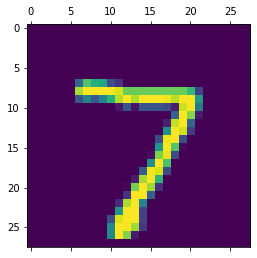

In [27]:
## Prediction of first image of test data 
plt.matshow(x_test[0])

In [28]:
y_predict= model.predict(x_test_flattened)
y_predict[0]

313/313 [==============================] - 0s 1ms/step


array([4.74057830e-04, 8.53855528e-12, 1.61942169e-02, 9.99023199e-01,
       3.64542885e-08, 2.20343682e-05, 1.11433071e-14, 1.00000000e+00,
       1.22703216e-03, 1.15103975e-01], dtype=float32)

In [29]:
y_predict_labels=[np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [30]:
## Prediction of first target image 
np.argmax(y_predict[0])

7

In [31]:
## Evaluating 137th digit
np.argmax(y_predict[137])

1

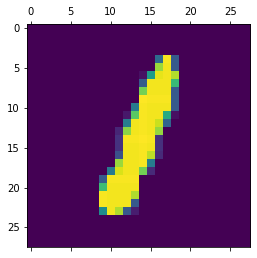

In [32]:
## Checking the 137th digit in test data 
plt.matshow(x_test[137])


In [33]:
## Confusion Matrix 
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    1,    2,    2,    3,    3,    0,    1,    1,    0],
       [   0, 1127,    4,    1,    0,    0,    1,    1,    1,    0],
       [   2,    1, 1010,    5,    3,    0,    1,    6,    3,    1],
       [   0,    0,    5,  990,    1,    5,    0,    3,    4,    2],
       [   1,    0,    5,    0,  969,    0,    0,    3,    0,    4],
       [   3,    0,    0,   15,    2,  861,    1,    2,    7,    1],
       [   3,    4,    3,    1,   10,   10,  925,    0,    2,    0],
       [   1,    4,    8,    4,    1,    0,    0, 1008,    0,    2],
       [   1,    0,   11,    8,    5,    3,    0,    6,  939,    1],
       [   2,    5,    0,   12,   24,    3,    0,   18,    4,  941]])>

Text(69.0, 0.5, 'Truth')

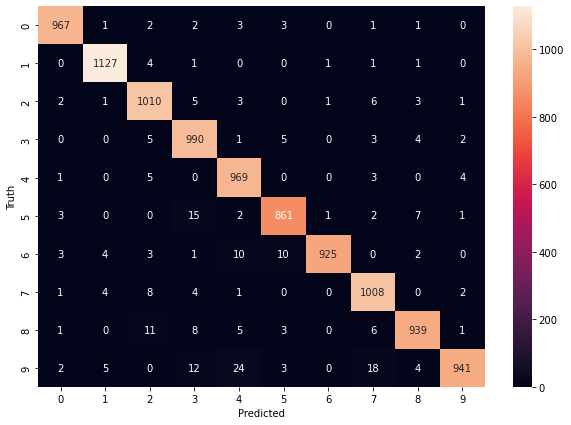

In [34]:
## Confusion Matrix using seaborn 

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
x_train_flattened.shape

(60000, 784)

In [36]:
y_train.shape

(60000,)

In [37]:
x_test.shape

(10000, 28, 28)

In [38]:
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [39]:
x_test_flattened.shape

(10000, 784)

In [40]:
y_test.shape

(10000,)

## 2. Support Vector Classification

In [41]:
from sklearn.svm import SVC
svc = SVC() ## base model with default parameters


In [42]:
svc.fit(x_train_flattened,y_train)

SVC()

In [43]:
predict=svc.predict(x_test_flattened)

In [44]:
from sklearn.metrics import accuracy_score
print("Test accuracy :",accuracy_score(y_test,predict))


Test accuracy : 0.9792


In [45]:
from sklearn.metrics import *
#classification report for SVC algorithm
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## 3. KNN algorithms 

In [46]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_flattened,y_train)
    pred_i = knn.predict(x_test_flattened)
    error_rate.append(np.mean(pred_i != y_test)) 
print(np.mean(pred_i != y_test))

0.0392


Text(0, 0.5, 'Error Rate')

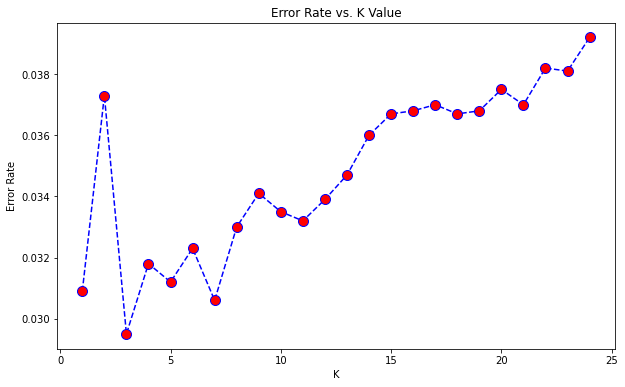

In [47]:
# The k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Error is lowest for K=3, after 3, the error is increasing. Thus we will take value of K=3.

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_flattened,y_train)
y_pred_KNN = knn.predict(x_test_flattened)
y_pred_KNN

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [49]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred_KNN))

The accuracy score is :  0.9705


In [50]:
#classification report for KNN algorithm
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## 4. Logistic Regression 

In [51]:

import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()#object creation of logistic regression
    
LR.fit(x_train_flattened,y_train)#training model with training data

y_train_LR=LR.predict(x_train_flattened)
y_test_LR=LR.predict(x_test_flattened)

from sklearn.metrics import accuracy_score,classification_report,f1_score
print("Train accuracy :",accuracy_score(y_train,y_train_LR))
print("Test accuracy :",accuracy_score(y_test,y_test_LR))

Train accuracy : 0.9350666666666667
Test accuracy : 0.9258


In [52]:
print(classification_report(y_test,y_test_LR))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



## 5. Decision tree 

In [53]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(x_train_flattened,y_train)#training the model
y_train_dt=dt.predict(x_train_flattened)
y_test_dt=dt.predict(x_test_flattened)#prediction
print("Train accuracy :",accuracy_score(y_train,y_train_dt))
print("Test accuracy :",accuracy_score(y_test,y_test_dt))

Train accuracy : 1.0
Test accuracy : 0.8781


In [54]:
print(classification_report(y_test,y_test_dt))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.95      0.96      0.95      1135
           2       0.88      0.84      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.87      0.88      0.87       982
           5       0.83      0.84      0.84       892
           6       0.90      0.88      0.89       958
           7       0.92      0.90      0.91      1028
           8       0.83      0.82      0.82       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## 6. Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_flattened,y_train)
y_train_rf=rf.predict(x_train_flattened)
y_test_rf=rf.predict(x_test_flattened)#prediction
print("Train accuracy :",accuracy_score(y_train,y_train_rf))
print("Test accuracy :",accuracy_score(y_test,y_test_rf))

Train accuracy : 1.0
Test accuracy : 0.9694


In [56]:
print(classification_report(y_test,y_test_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## 7. Naive Bayes

In [57]:
### Naive Bayes 
# Initialising the model
from sklearn.naive_bayes import GaussianNB   ## Gaussian because ditribution is normal
NB = GaussianNB()
NB.fit(x_train_flattened,y_train) # feed data to the model
y_train_nb=NB.predict(x_train_flattened)
y_test_nb=NB.predict(x_test_flattened)#prediction
print("Train accuracy :",accuracy_score(y_train,y_train_nb))
print("Test accuracy :",accuracy_score(y_test,y_test_nb))

Train accuracy : 0.5649
Test accuracy : 0.5558


In [58]:
print(classification_report(y_test,y_test_nb))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



## 8. XGBoost 

In [59]:
import xgboost

In [60]:
from xgboost import XGBClassifier#importing the model library
xgb=XGBClassifier() ## object creation
xgb.fit(x_train_flattened,y_train)# fitting the data
y_train_xgb=xgb.predict(x_train_flattened)
y_test_xgb=xgb.predict(x_test_flattened)#prediction
print("Train accuracy :",accuracy_score(y_train,y_train_xgb))
print("Test accuracy :",accuracy_score(y_test,y_test_xgb))

Train accuracy : 1.0
Test accuracy : 0.978


In [61]:
print(classification_report(y_test,y_test_xgb))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## 9. Convolutional Neural Network  

In [62]:
## Increasing one dimension for kernel operation 
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [63]:
## Model Creation

num_classes = 10
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

from tensorflow.keras import layers
## iniatializing cnn 
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),  ## convolutional layer 1
        layers.MaxPooling2D(pool_size=(2, 2)),     ## max pooling
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), ## convolutional layer 2
        layers.MaxPooling2D(pool_size=(2, 2)), ## max pooling
        layers.Flatten(), ## flattening
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"), ## fully connecting the layers
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [64]:
## Training the model

batch_size = 512
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

cnn=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
106/106 [==============================] - 18s 161ms/step - loss: 0.6945 - accuracy: 0.7896 - val_loss: 0.1376 - val_accuracy: 0.9633
Epoch 2/15
106/106 [==============================] - 17s 162ms/step - loss: 0.1718 - accuracy: 0.9480 - val_loss: 0.0845 - val_accuracy: 0.9783
Epoch 3/15
106/106 [==============================] - 17s 159ms/step - loss: 0.1215 - accuracy: 0.9630 - val_loss: 0.0668 - val_accuracy: 0.9815
Epoch 4/15
106/106 [==============================] - 17s 161ms/step - loss: 0.0996 - accuracy: 0.9693 - val_loss: 0.0547 - val_accuracy: 0.9848
Epoch 5/15
106/106 [==============================] - 18s 173ms/step - loss: 0.0842 - accuracy: 0.9741 - val_loss: 0.0482 - val_accuracy: 0.9867
Epoch 6/15
106/106 [==============================] - 19s 182ms/step - loss: 0.0754 - accuracy: 0.9771 - val_loss: 0.0484 - val_accuracy: 0.9883
Epoch 7/15
106/106 [==============================] - 20s 191ms/step - loss: 0.0665 - accuracy: 0.9789 - val_loss: 0.0422 - val_ac

In [65]:
## Model Evaluation

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.029343780130147934
Test accuracy: 0.9897000193595886


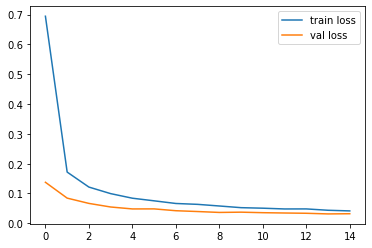

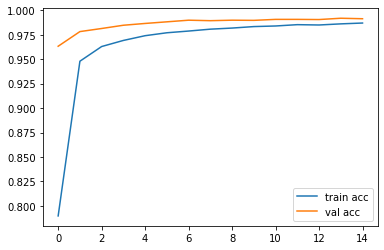

<Figure size 432x288 with 0 Axes>

In [66]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(cnn.history['loss'], label='train loss')
plt.plot(cnn.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(cnn.history['accuracy'], label='train acc')
plt.plot(cnn.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## In graph 1, train loss and val loss both are decreasing.
## In graph 2, train accuracy and val accuracy both are increasing.

In [1]:
import pandas as pd
from tabulate import tabulate

L={ 'Algorithms': ['Convolutional Neural Network','SVC','XGBoost','Neural Network', 'KNN','Random Forest','Logistic Regression', 
                   'Decision Tree','Naive Bayes'],
                   
     'Accuracy': [98.97, 97.92, 97.80, 97.35,97.05, 96.94, 92.58, 87.81, 55.58]}

df=pd.DataFrame(L)
df=pd.DataFrame(L,index=[1,2,3,4,5,6,7,8,9])
df

,Algorithms,Accuracy
1,Convolutional Neural Network,98.97
2,SVC,97.92
3,XGBoost,97.80
4,Neural Network,97.35
5,KNN,97.05
6,Random Forest,96.94
7,Logistic Regression,92.58
8,Decision Tree,87.81
9,Naive Bayes,55.58


## CNN gives the best performance with 98.97 % accuracy.

## Challenges faced : 
1. Understanding model creation and layers required: Initally we found the CNN a bit difficult to understand because of the        complexity of hidden layers and how to apply the image data to it.
2. Dimensionality error: For algorithms except CNN, the array dimension should be <=2. For CNN we added one dimension to          x_train and x_test using expand function whereas for other algorithms x_train and x_test was flattened using reshape            function.
3. In CNN, shape incompatibility error was faced. To remove this error, we changed categorical cross entropy to binary cross      entropy by applying keras.utils.to_categorical() function to y_train and y_test.
4. Low accuracy in CNN was improved when we used activation function 'softmax' in the last output layer instead of 'sigmoid'.
5. Api reference: Searching apis for tensorflow is bit hard. After some analysis we decided to use keras.


## Conclusion

1. CNN model gives the highest accuracy for this project. So we recommend CNN for these kind of applications.
   Although SVC and XGBoost gave us almost same accuracy as CNN we suggest not to use it from computational power stand point      because these algorithms take more computational power when compared to CNN.
2. Naive Bayes has lowest accuracy since it considers that all the input variables are independent which is not the case here. 
   Because we can clearly see the similarity in the shapes between some numbers like (8,9),(1,7),(5,6),(7,9). So we highly        recommend no to use naive bayes for this kind of applications.
